In [1]:
# !pip install tensorflow

In [2]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
	target_size=(224,224)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = r"moving\rockgame\dataset\paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

0  images to be resized.
0  images resized.
보 이미지 resize 완료!


In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

def load_data(img_path, number_of_data=3914):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=224
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = Image.open(file).resize((224, 224))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = Image.open(file).resize((224, 224))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = Image.open(file).resize((224, 224))  # 크기를 (28, 28)로 변경
        img = np.array(img, dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "dataset" #폴더명
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3914 입니다.
x_train shape: (3914, 224, 224, 3)
y_train shape: (3914,)


In [8]:
# for i in range(100):
#     plt.imshow(x_train[i])
#     print('라벨 : ', y_train[i])
#     plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(20, activation='softmax'))

model.summary()

c:\Users\zqrc0\anaconda3\envs\motionpy310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,909,972 (91.21 MB)

 Trainable params: 23,909,972 (91.21 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.6485 - loss: 1.8056
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 199ms/step - accuracy: 0.9984 - loss: 0.0124
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 201ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 201ms/step - accuracy: 1.0000 - loss: 3.0338e-04
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 1.0000 - loss: 2.0101e-04
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 204ms/step - accuracy: 1.0000 - loss: 1.1960e-04
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - accuracy: 1.0000 - loss: 6.4347e-05
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 202ms/step - accuracy: 1.0000 - loss: 4.4611e-05
Epoch 9/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 207ms/step - accuracy: 1.0000 - loss: 2.8398e-05
Epoch 10/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 207ms/step - accuracy: 1.0000 - loss: 1.7570e-05
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 208ms/step - accuracy: 1.0000 - loss

In [11]:
image_dir_path = "dataset/test"
(x_test, y_test)=load_data(image_dir_path,328)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 328 입니다.
x_test shape : (328, 224, 224, 3)
y_test shape : (328,)


In [12]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

11/11 - 1s - 51ms/step - accuracy: 0.4421 - loss: 3.9165
test_loss : 3.9164535999298096
test_accuracy : 0.44207316637039185


In [13]:
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=100		# 값을 변경해서 찾아보자
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
model.predict() 결과 :  [1.41514465e-02 9.78679419e-01 7.16915634e-03 6.35557789e-15
 1.41568752e-17 2.44073020e-16 1.64936051e-14 5.09763391e-19
 2.12594394e-14 1.19302911e-17 2.09184663e-14 1.73847143e-17
 5.10991048e-15 7.53975775e-21 1.18285897e-19 1.58009013e-18
 7.68007261e-16 1.29852814e-17 6.16560809e-23 1.82682335e-16]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


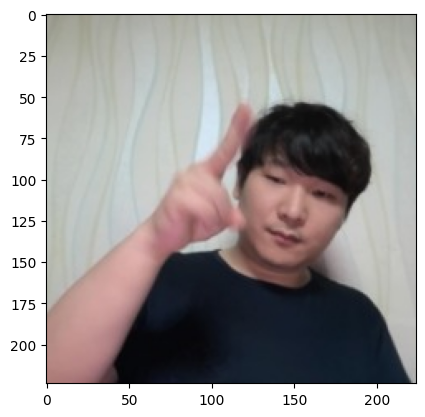

In [14]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.4046231e-03 9.9651563e-01 7.9727710e-05 8.9657498e-17 2.5992170e-14
 2.7877245e-13 1.4782876e-15 4.0723671e-15 2.0613697e-13 6.3023453e-18
 1.4341375e-18 1.3952708e-14 1.4750881e-15 5.5341507e-14 2.9574124e-18
 2.5088158e-16 7.9943453e-17 5.3069776e-21 2.8872108e-16 1.6686371e-18]
라벨: 2, 예측결과: 1
266


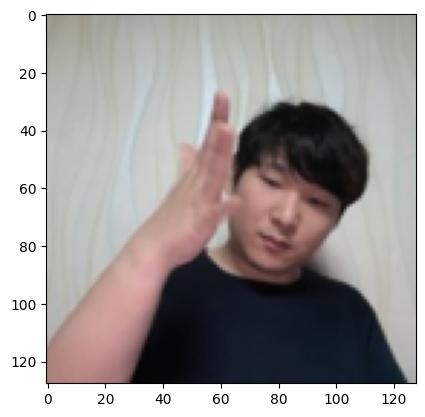

예측확률분포: [1.5639904e-05 9.9998116e-01 3.2002472e-06 9.3967775e-18 6.1744484e-15
 3.1166110e-14 1.7855780e-16 3.2735618e-16 4.4085934e-14 4.4904601e-19
 7.7925118e-20 1.7028822e-15 2.1821766e-16 8.0764100e-15 8.8602036e-20
 4.1020972e-17 1.2454120e-17 4.6374338e-22 2.0081530e-17 3.4529778e-19]
라벨: 0, 예측결과: 1
31


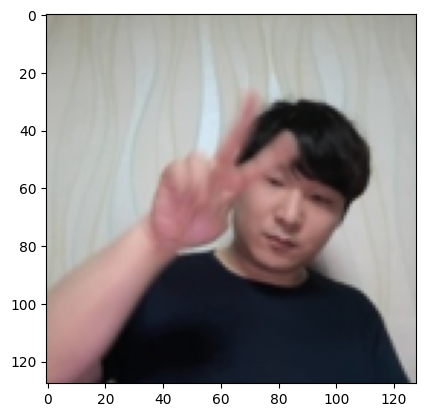

예측확률분포: [4.9479697e-02 9.4993776e-01 5.8256485e-04 2.1839299e-16 5.3465919e-14
 8.7936998e-13 5.6130819e-15 1.3283562e-14 6.3694465e-13 2.1681736e-17
 6.5164478e-18 5.4487691e-14 3.7934980e-15 1.8599854e-13 2.1659415e-17
 7.1844975e-16 2.8893109e-16 1.4219587e-20 1.1411154e-15 3.5520389e-18]
라벨: 0, 예측결과: 1
43


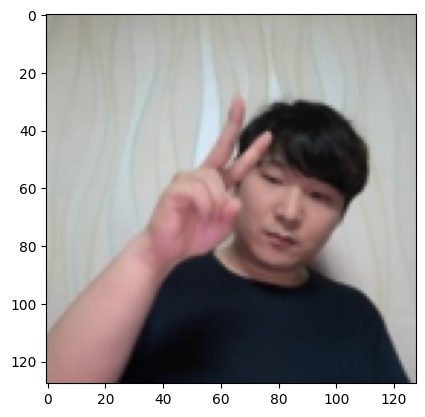

예측확률분포: [7.0168297e-03 9.9297172e-01 1.1460288e-05 4.9860068e-17 1.5070544e-14
 1.5544674e-13 9.9393429e-16 3.9583379e-15 1.8230953e-13 2.7384178e-18
 8.7622973e-19 6.6883814e-15 1.3558809e-15 2.1879554e-14 2.0845661e-18
 1.2476238e-16 4.3501835e-17 3.5583327e-21 1.6971811e-16 7.9283147e-19]
라벨: 2, 예측결과: 1
268


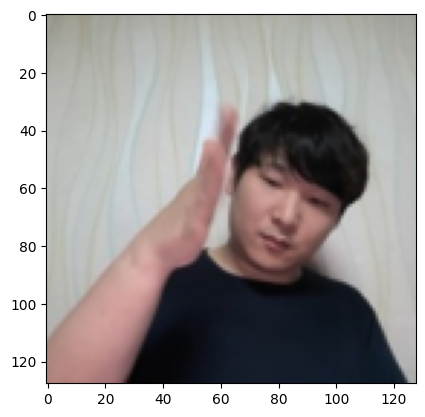

예측확률분포: [1.6464446e-04 9.6099490e-01 3.8840428e-02 1.3921184e-16 4.2339931e-14
 5.6075923e-13 8.2206723e-16 8.5277906e-16 7.6784634e-14 1.3343251e-17
 9.6409245e-19 3.9875411e-14 2.8388759e-16 3.3873932e-13 1.0620079e-18
 3.7103540e-16 8.9005031e-17 2.2387078e-21 2.9328376e-16 2.4897578e-18]
라벨: 2, 예측결과: 1
231


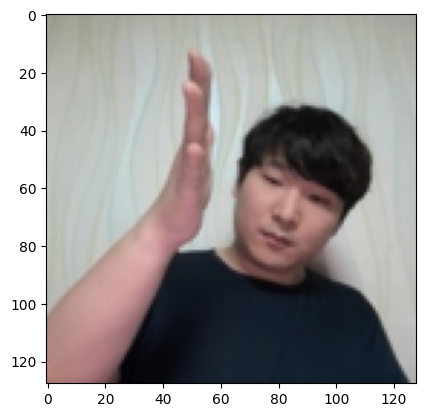

예측확률분포: [3.3110607e-02 8.6338532e-01 1.0350407e-01 9.5547324e-15 1.1311704e-12
 1.8966181e-11 1.1700145e-13 1.6032088e-13 4.2340268e-12 1.4757160e-15
 2.5977087e-16 2.2149773e-12 3.9492830e-14 1.2833552e-11 7.9313968e-16
 2.6962815e-14 8.6222067e-15 8.8817122e-19 3.3079608e-14 1.7319923e-16]
라벨: 2, 예측결과: 1
312


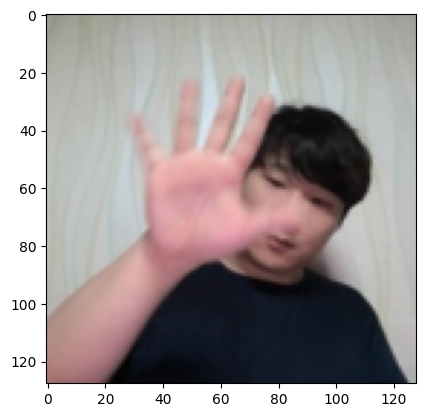

예측확률분포: [5.2749020e-01 4.7249383e-01 1.5906970e-05 1.8892158e-16 2.6152561e-14
 4.2082773e-13 4.0200146e-15 2.4737994e-14 6.3800137e-13 8.0938878e-18
 5.1825885e-18 1.8115832e-14 5.8051632e-15 3.9107786e-14 2.3019027e-17
 3.1524449e-16 1.5993374e-16 1.5797245e-20 7.3841262e-16 1.5927966e-18]
라벨: 1, 예측결과: 0
185


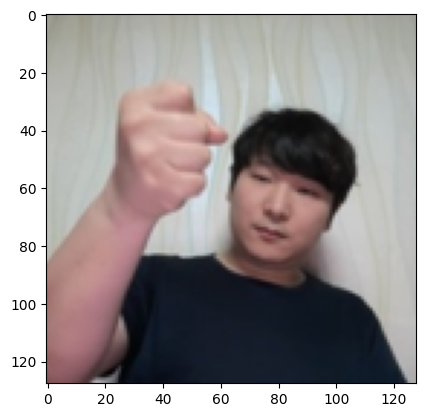

예측확률분포: [1.4947676e-04 9.1454566e-01 8.5304849e-02 3.2324770e-16 8.0113379e-14
 1.0754008e-12 1.6922115e-15 1.6434419e-15 1.2094970e-13 3.4428829e-17
 2.4608727e-18 8.3092245e-14 5.1401464e-16 7.7575609e-13 2.5601327e-18
 7.9949052e-16 1.7305898e-16 5.8987477e-21 6.3727810e-16 6.0852605e-18]
라벨: 2, 예측결과: 1
224


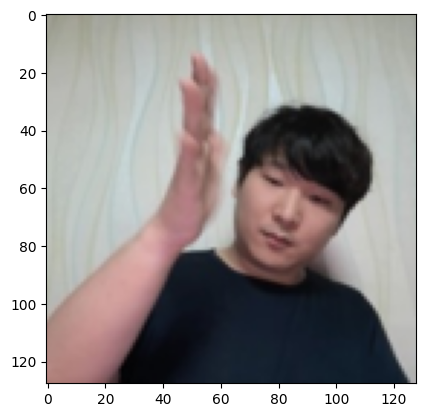

예측확률분포: [6.6970068e-04 9.9932671e-01 3.6705769e-06 6.9540727e-18 2.5264348e-15
 2.3859075e-14 2.0235364e-16 6.4205156e-16 5.5737895e-14 2.2661719e-19
 9.1181702e-20 1.4389262e-15 2.1698779e-16 4.7067325e-15 1.5635223e-19
 2.7310994e-17 7.3976880e-18 2.3714027e-22 1.5243304e-17 1.2600931e-19]
라벨: 0, 예측결과: 1
65


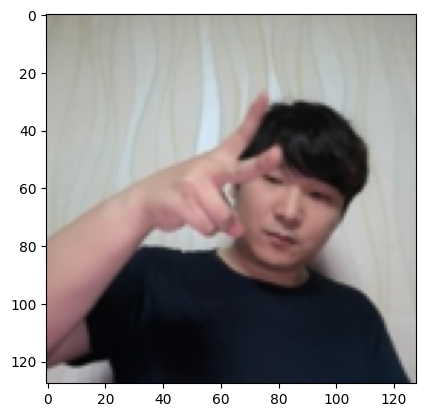

예측확률분포: [2.70910270e-04 9.49082077e-01 5.06470352e-02 9.93688973e-16
 2.10710328e-13 2.53366208e-12 7.57749068e-15 7.51152714e-15
 3.69743922e-13 1.28261673e-16 1.13506534e-17 2.54266985e-13
 2.34213821e-15 1.92538802e-12 1.47351936e-17 2.61302337e-15
 6.02496018e-16 4.10793628e-20 2.30749859e-15 2.32587786e-17]
라벨: 2, 예측결과: 1
223


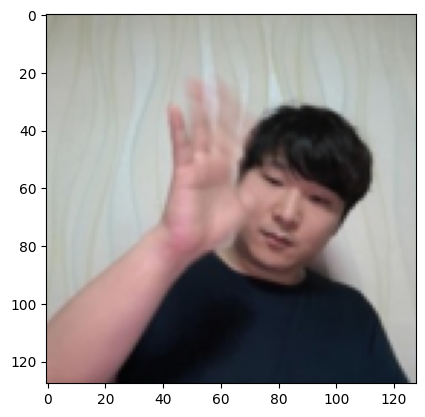

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=10) # k값을 수정하면 더 많은 값의 수를 볼 수 있다.

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    print(n)
    plt.show()

In [ ]:
model.save('dataset/model/model.keras', include_optimizer=False)